In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [2]:
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()


In [3]:
# set the random seed
torch.manual_seed(0)


### Make some Data
Create some linearly seperable data with three classes

In [4]:
# create the data class

class Data(Dataset):

    # constructor
    def __init__(self):
        self.x = torch.arange(-2,2,0.1).view(-1,1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]

     # Getter
    def __getitem__(self,index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

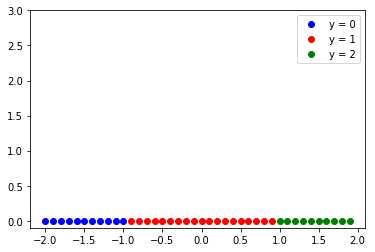

In [5]:
# Create the dataset object and plot the dataset object

data_set = Data()
data_set.x
plot_data(data_set)

In [6]:
# build a softmax classifier using sequential module

model = nn.Sequential(nn.Linear(1,3))
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.0075],
                      [ 0.5364],
                      [-0.8230]])),
             ('0.bias', tensor([-0.7359, -0.3852,  0.2682]))])

## Train the model

In [7]:
# create criterian(cost function), optimizer, dataloader
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
trainloader = DataLoader(dataset=data_set, batch_size=5)

Train the model for every 50 epochs plot, the line generated for each class

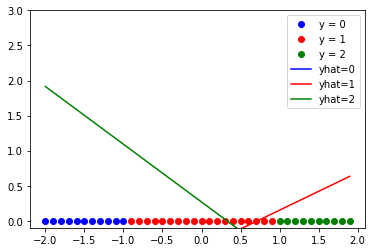

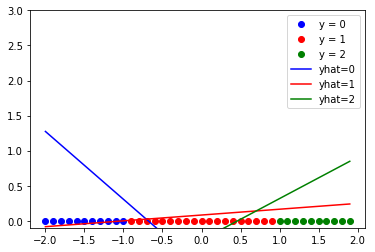

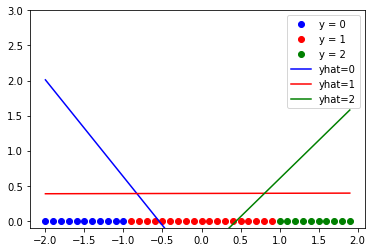

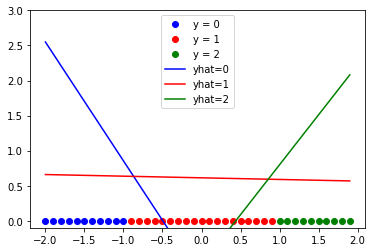

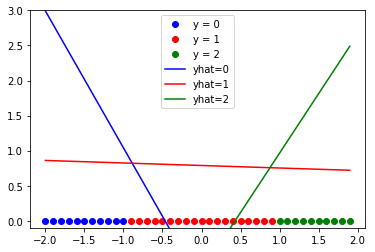

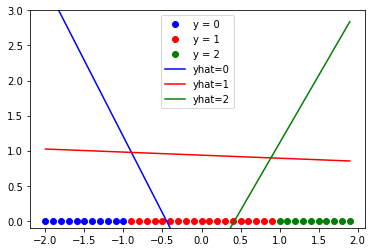

In [8]:
# Train the model
LOSS = []
def train_model(epochs):
    for epoch in range(epochs):
        if epoch % 50 == 0:
            pass
            plot_data(data_set,model)
        for x,y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterian(yhat,y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()
train_model(300)

Analyse the results

In [9]:
# Make predictions

z = model(data_set.x)
_, yhat = z.max(1)
print('prediction:',yhat)

prediction: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


Calculate the accuracy on the test data

In [11]:
# Print the accuracy

correct = (data_set.y == yhat).sum().item()
accuracy = correct / len(data_set)
print('accuracy:',accuracy)

accuracy: 0.975


In [13]:
Softmax_fn = nn.Softmax(dim=1)
Probability = Softmax_fn(z)

In [14]:
for i in range(3):
    print("probability of class {} isg given by  {}".format(i, Probability[0,i]) )

probability of class 0 isg given by  0.9267547726631165
probability of class 1 isg given by  0.07310982048511505
probability of class 2 isg given by  0.00013548212882597
